In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplstyles
%matplotlib inline

/home/jhaux/.local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [88]:
def deg2rad(degree):
    return np.pi / 180 * degree

def rad2deg(radian):
    return radian * 180  / np.pi

def h(H, d=deg2rad(-35), Phi=deg2rad(37.23)):
    return np.arcsin(np.cos(H) * np.cos(d) * np.cos(Phi) + np.sin(d) * np.sin(Phi))

def h2h(h):
    hours = np.floor(h)
    decimals = float(h) - float(hours)
    minutes = decimals*60
    return '{0}:{1}'.format(int(hours), int(minutes))

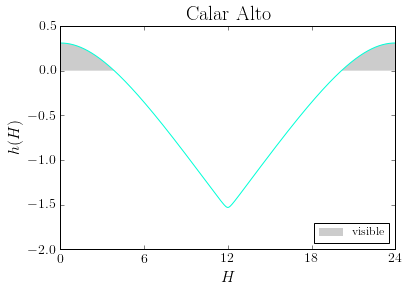

In [62]:
H = np.linspace(0,24, 1000)
H_in_Rad = deg2rad(H * 15.)
hh = h(H_in_Rad)

fig, ax = plt.subplots(1,1)
ax.fill_between(H,hh, where=hh >= 0, label='visible', facecolor=(0,0,0,0.2), edgecolor='None')
ax.plot(H,hh)
ax.set_xlabel('$H$')
ax.set_ylabel('$h(H)$')
ax.set_title('Calar Alto')
ax.set_xlim(0,24)
ax.set_xticks(np.append(range(0,24,6),24))
ax.legend(loc=4)

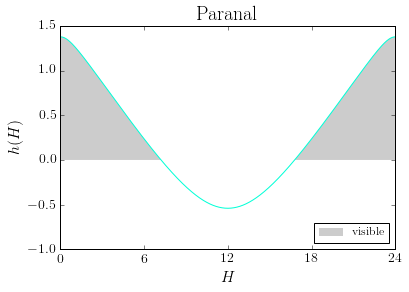

In [4]:
hh2 = h(H_in_Rad, Phi=deg2rad(-(24.+40/60)))

fig, ax = plt.subplots(1,1)
ax.plot(H,hh2)
ax.fill_between(H,hh2, where=hh2 >= 0, label='visible', facecolor=(0,0,0,0.2), edgecolor='None')
ax.set_xlabel('$H$')
ax.set_ylabel('$h(H)$')
ax.set_title('Paranal')
ax.set_xticks(np.append(range(0,24,6),24))
ax.set_xlim(0,24)
ax.legend(loc=4)

/home/jhaux/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 500
  app.launch_new_instance()
/home/jhaux/.local/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 500


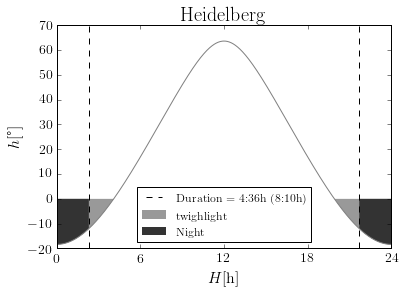

In [90]:
hh_HD = -rad2deg(h(H_in_Rad, Phi=deg2rad(-(49.+25/60)), d=deg2rad(22.63)))

h20, h21 = H[hh_HD[:500]<=-12][-1], H[501:-1][hh_HD[501:-1]<=-12][0]
tw1, tw2 = H[hh_HD[:500]<=0][-1], H[501:-1][hh_HD[501:-1]<=0][0]
duration = h2h(h20 - h21 + 24)
duration_tw = h2h(tw1 - tw2 + 24)
fig, ax = plt.subplots(1,1)
ax.plot(H,hh_HD, 'gray')
ax.fill_between(H, hh_HD, where=hh_HD <=0, label='twighlight', facecolor=(0.6,0.6,0.6,1), edgecolor='None')
ax.fill_between(H, hh_HD, where=hh_HD <= -12, label='Night', facecolor=(0.2,0.2,0.2,1), edgecolor='None')
ax.axvline(h20, ls='--', color='k')
ax.axvline(h21, ls='--', color='k', label='Duration = '+duration+'\si{\hour} ('+duration_tw+'\si{\hour})')
ax.set_xlabel('$H [\si{\hour}]$')
ax.set_ylabel('$h [\si{\degree}]$')
ax.set_title('Heidelberg')
ax.set_xticks(np.append(range(0,24,6),24))
ax.set_xlim(0,24)
ax.legend(loc=8)
fig.savefig('night.pdf')